In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

In [2]:
#mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
X_train_scaled = scaler.transform(X_train)

print("transfprmed shape; {}".format(X_train_scaled.shape))
print("per-feature minimun before  scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximun before  scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transfprmed shape; (426, 30)
per-feature minimun before  scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximun before  scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
X_test_scaled = scaler.transform(X_test)

print("per-feature minimum after scaling:\n {}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [8]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit(X).transform(X)
X_scaled_d = scaler.fit_transform(X)

In [10]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train,y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test,y_test)))

Test set accuracy: 0.63


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


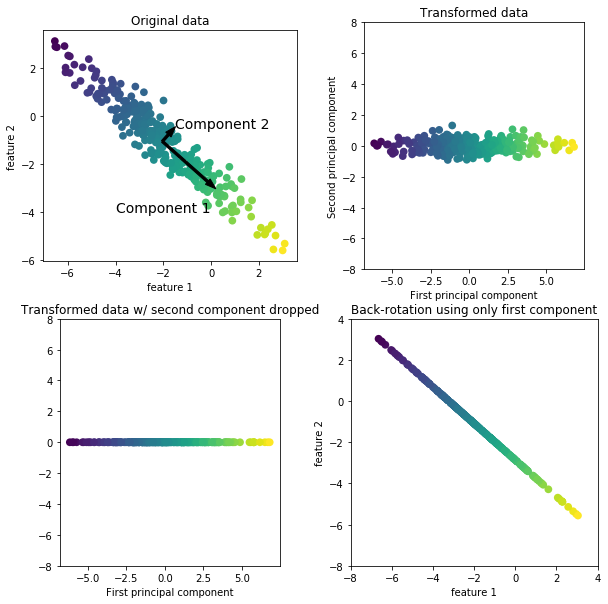

In [13]:
mglearn.plots.plot_pca_illustration()

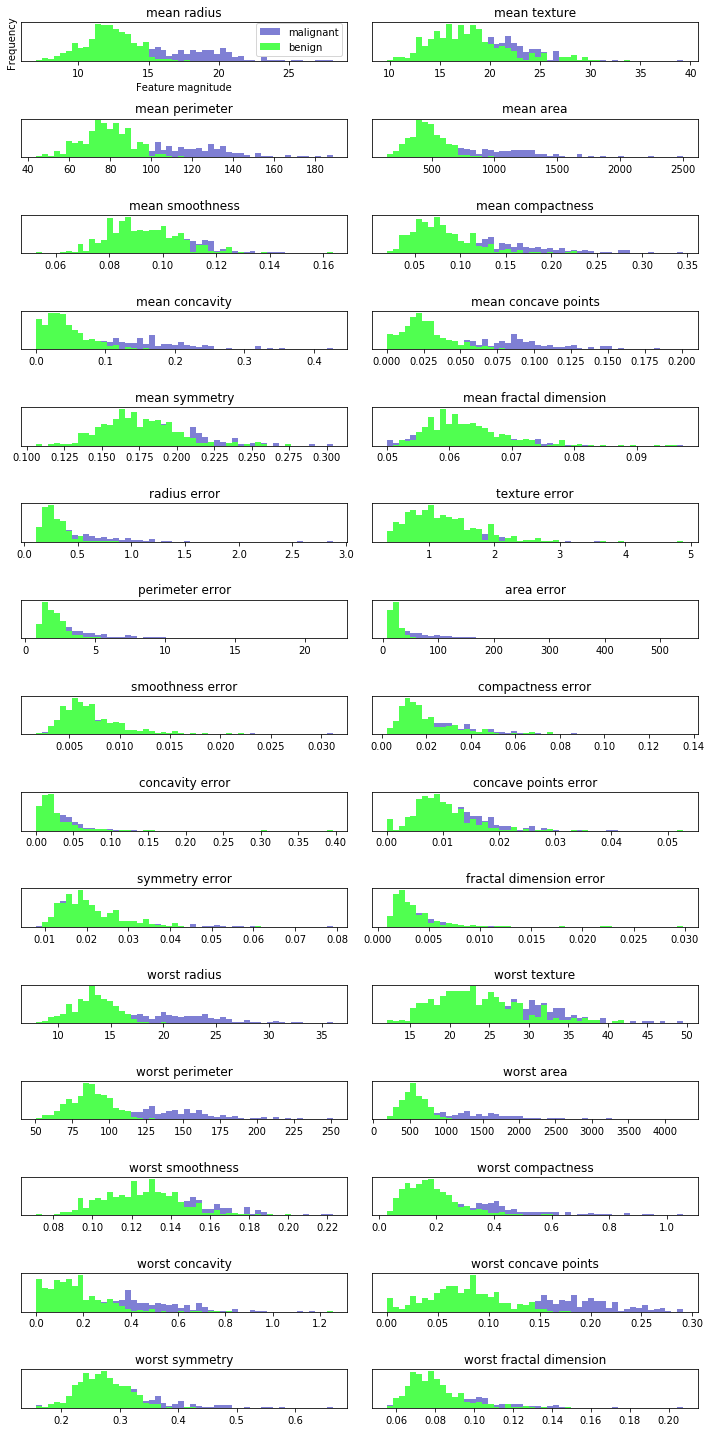

In [14]:
fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i],bins = 50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2))
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"],loc = "best" )
fig.tight_layout()

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Original shape:{}".format(str(X_scaled.shape)))
print("Redecued shape:{}",format(str(X_pca.shape)))

Original shape:(569, 30)
Redecued shape:{} (569, 2)


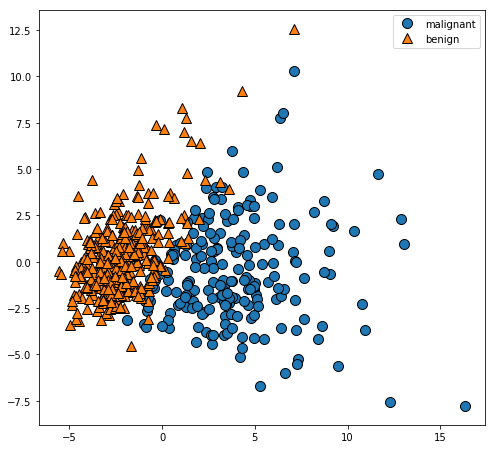

In [17]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")

In [18]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [19]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

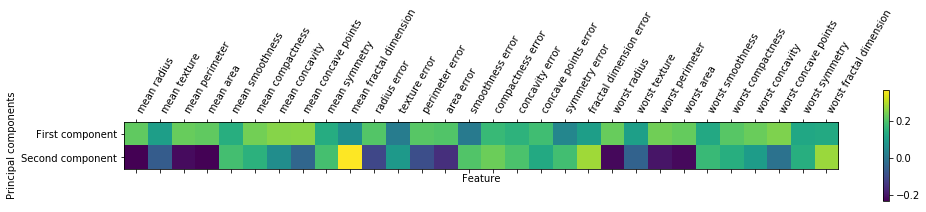

In [20]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation=60, ha=
          'left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

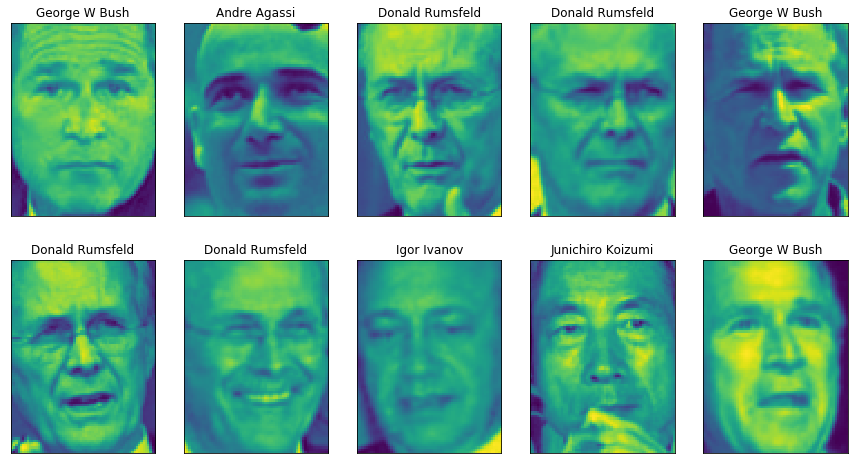

In [21]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people( resize=0.7,min_faces_per_person=20)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [22]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (2037, 87, 65)
Number of classes: 30


In [23]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='    ')
    if(i+1)%3==0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Ariel Sharon               77    Atal Bihari Vajpayee       24    
Bill Clinton               29    Colin Powell              236    Donald Rumsfeld           121    
George Robertson           22    George W Bush             530    Gerhard Schroeder         109    
Gloria Macapagal Arroyo    44    Hamid Karzai               22    Hans Blix                  39    
Igor Ivanov                20    Jacques Chirac             52    John Ashcroft              53    
Junichiro Koizumi          60    Kofi Annan                 32    Laura Bush                 41    
Lleyton Hewitt             41    Megawati Sukarnoputri      33    Pete Sampras               22    
Saddam Hussein             23    Serena Williams            52    Tiger Woods                23    
Tom Daschle                25    Tony Blair                144    Vicente Fox                32    


In [24]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.37


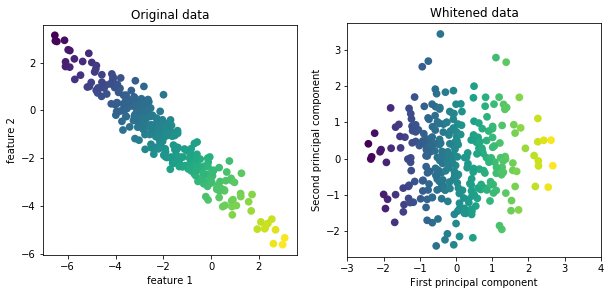

In [26]:
mglearn.plots.plot_pca_whitening()

In [27]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (827, 100)


In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.42


In [29]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


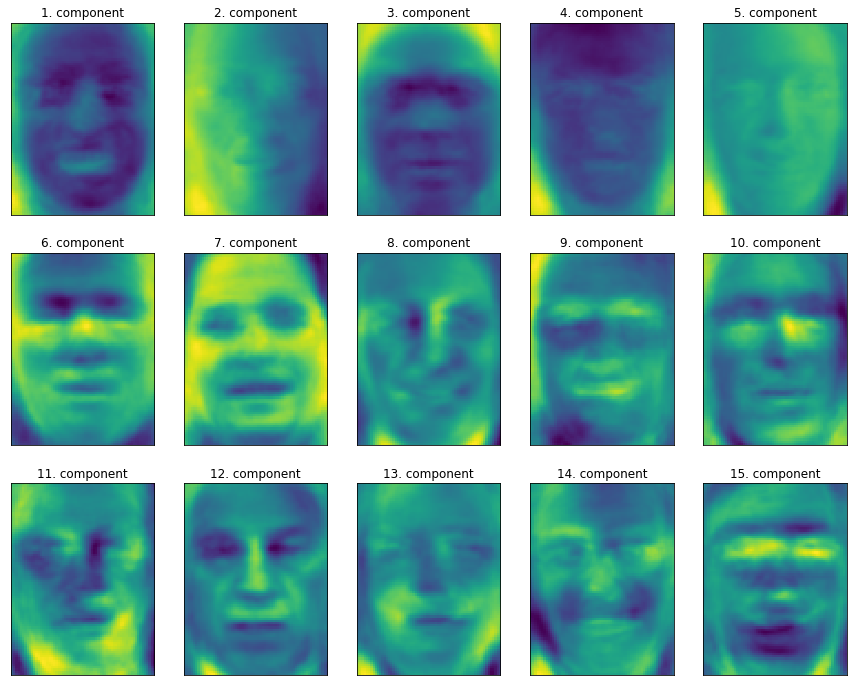

In [30]:
fix,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks': (),'yticks': ()})
for i,(component,ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}. component".format((i+1)))

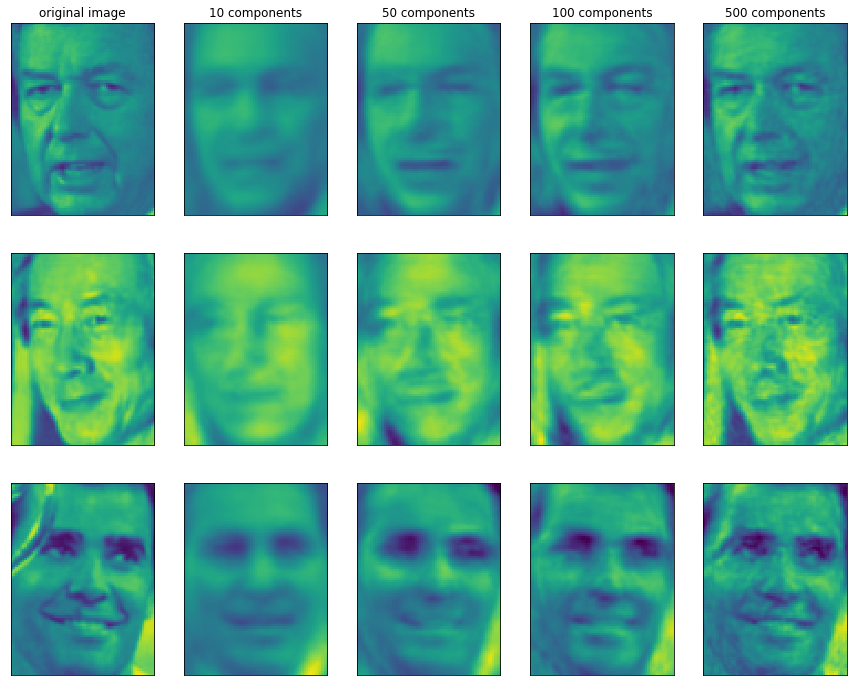

In [31]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second principal component')

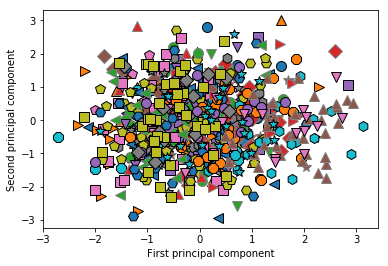

In [32]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

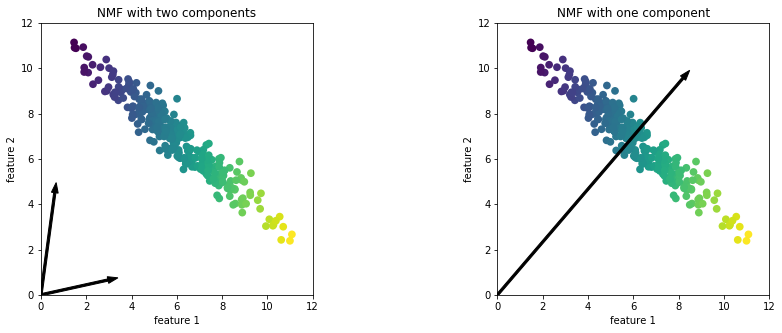

In [33]:
mglearn.plots.plot_nmf_illustration()

In [34]:
#mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

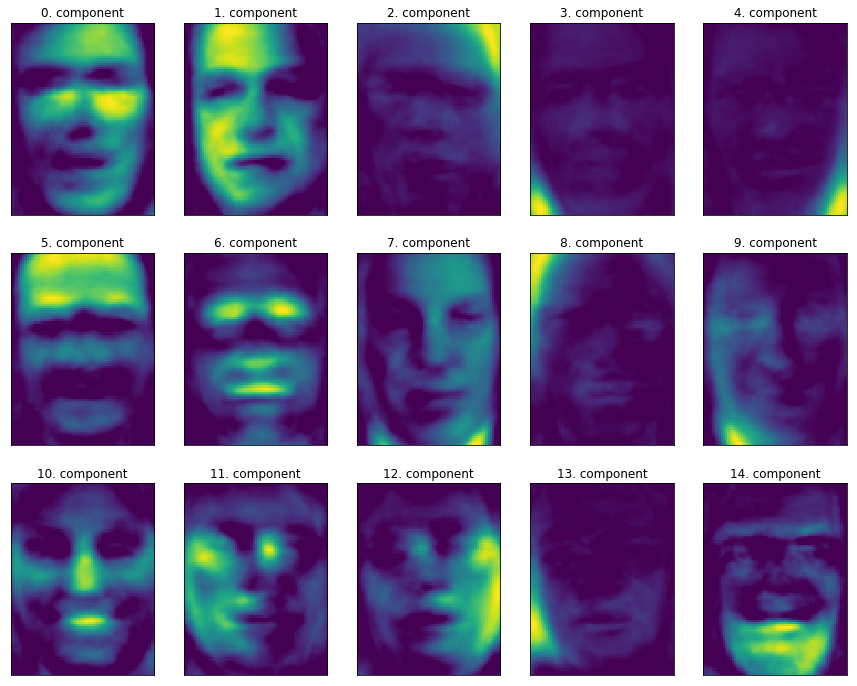

In [35]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf= nmf.transform(X_test)

fix,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

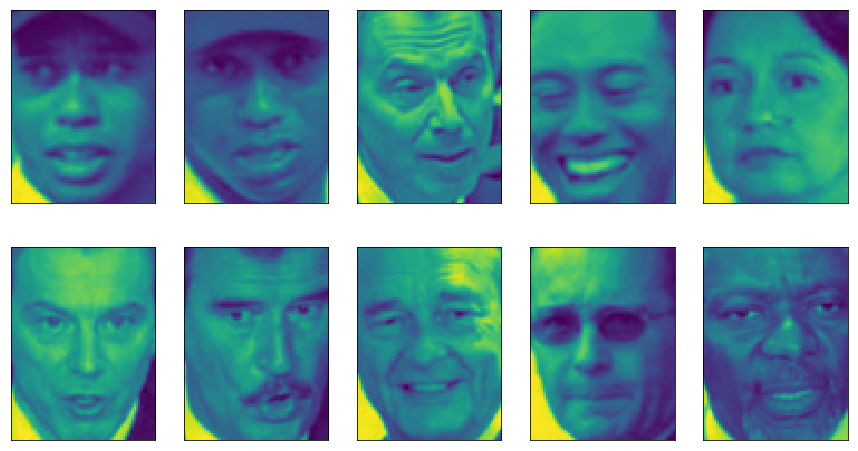

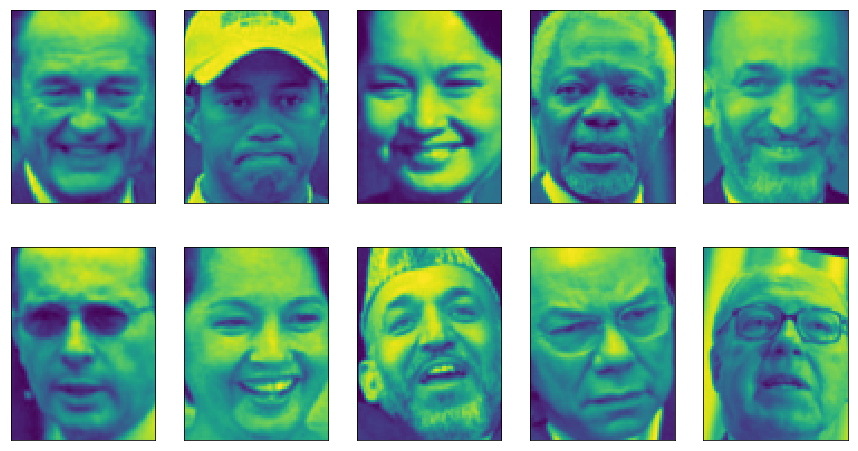

In [36]:
compn = 3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks': (),'yticks': ()})
for i,(ind, ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn=5
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks': (),'yticks': ()})
for i,(ind, ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

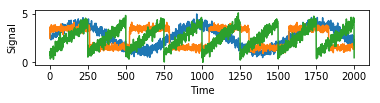

In [37]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [38]:
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [39]:
nmf = NMF(n_components=3, random_state=42)
S_=nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [40]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

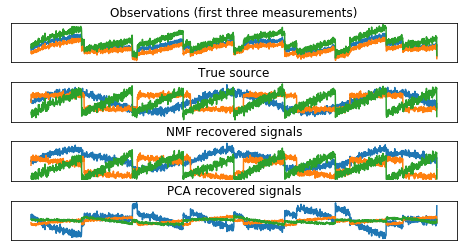

In [41]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True source',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

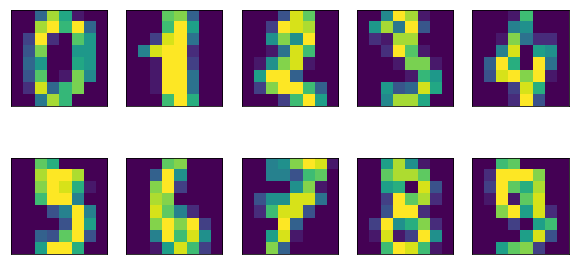

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5,figsize=(10,5),subplot_kw={'xticks': (), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

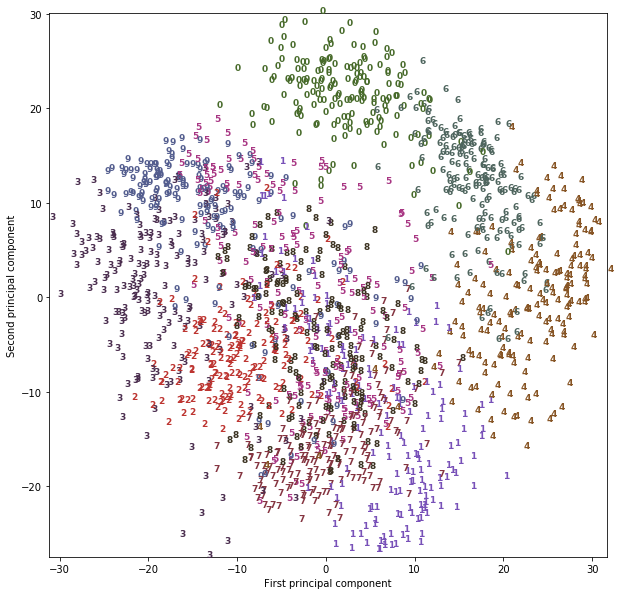

In [43]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1],str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight':'bold', 'size':9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

digits_tsne = tsne.fit_transform(digits.data)

Text(0.5, 0, 't-SNE feature 1')

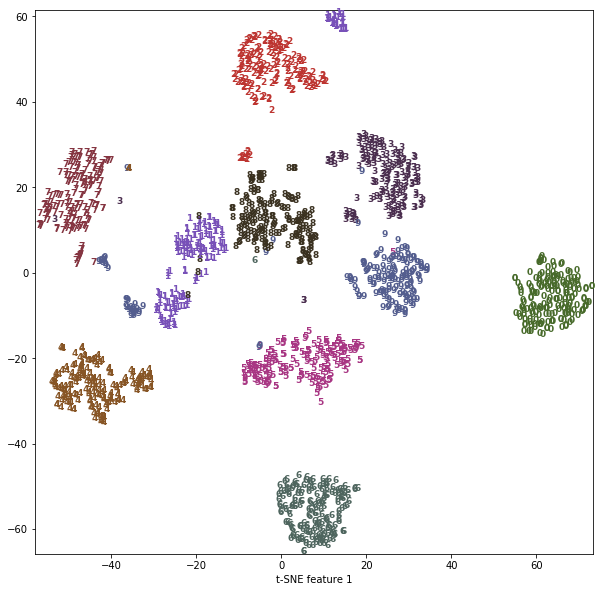

In [45]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

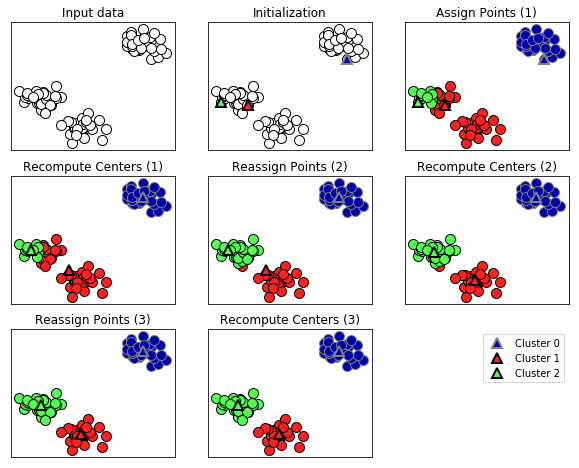

In [46]:
mglearn.plots.plot_kmeans_algorithm()

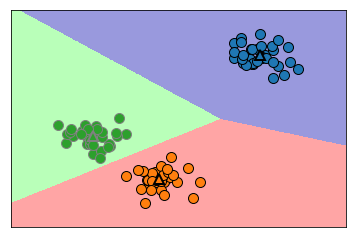

In [47]:
mglearn.plots.plot_kmeans_boundaries()

In [48]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [50]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


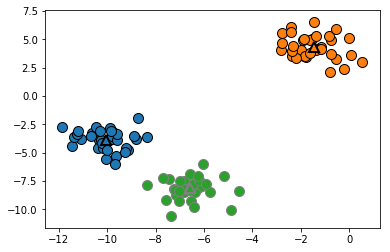

In [51]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^',markeredgewidth=2)

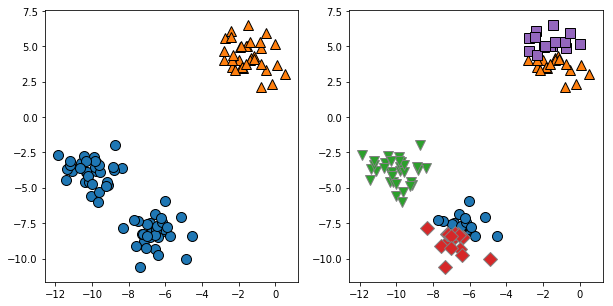

In [52]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
kmeans= KMeans(n_clusters=2)
kmeans.fit(X)
assignments=kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[1])

Text(0, 0.5, 'Feature 1')

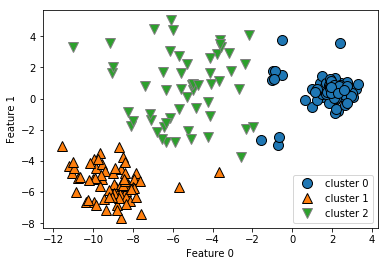

In [53]:
X_varied, y_varied = make_blobs(n_samples=200,cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn. discrete_scatter(X_varied[:,0], X_varied[:,1],y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

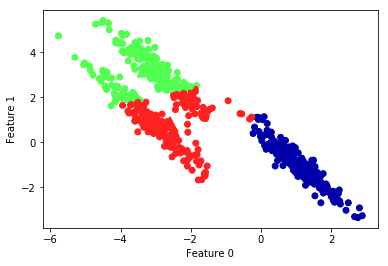

In [54]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^',c=[0,1,2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

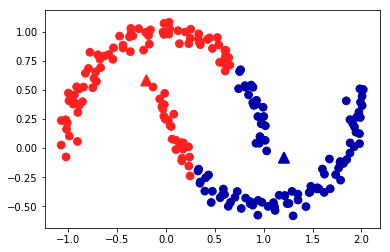

In [55]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker='^',c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test),nmf.components_)

Text(0, 0.5, 'nmf')

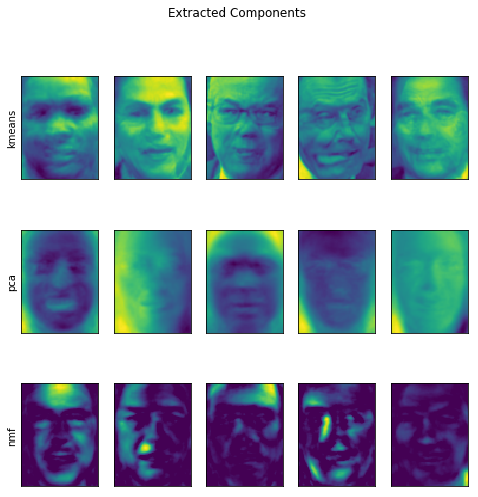

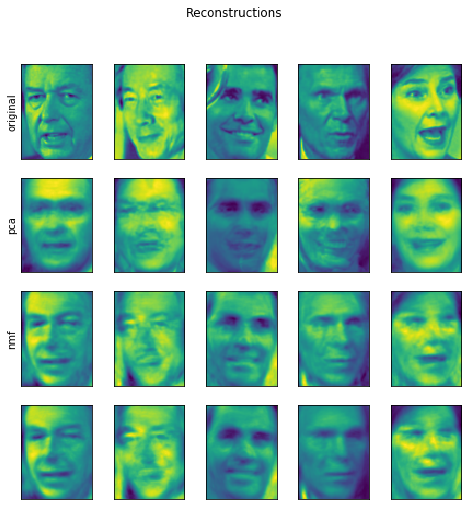

In [57]:
fig, axes = plt.subplots(3,5,figsize=(8,8),subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape),cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")

fig, axes = plt.subplots(4,5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8,8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf, in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel("original")
axes[1,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")

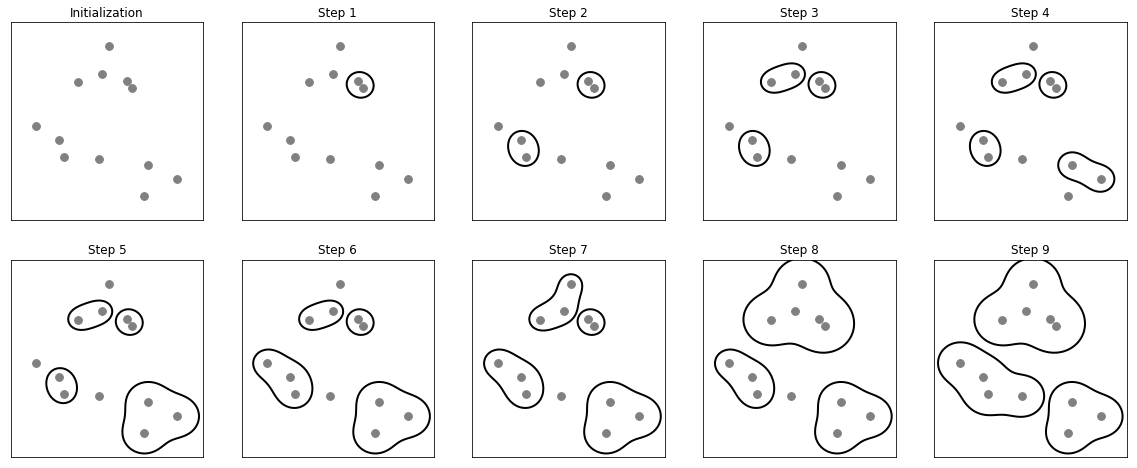

In [58]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

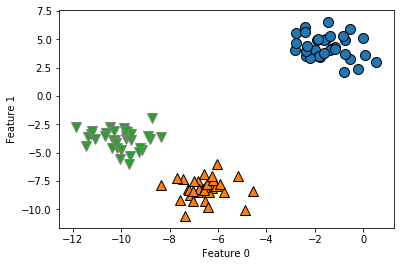

In [59]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

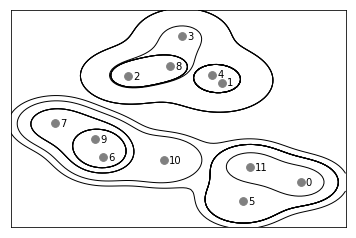

In [60]:
mglearn.plots.plot_agglomerative()

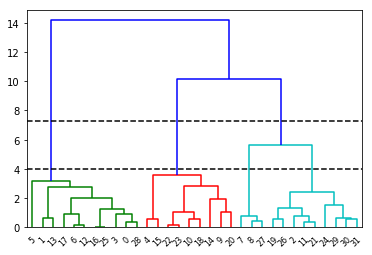

In [61]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=32)
linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4,4], '--', c='k')

In [62]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


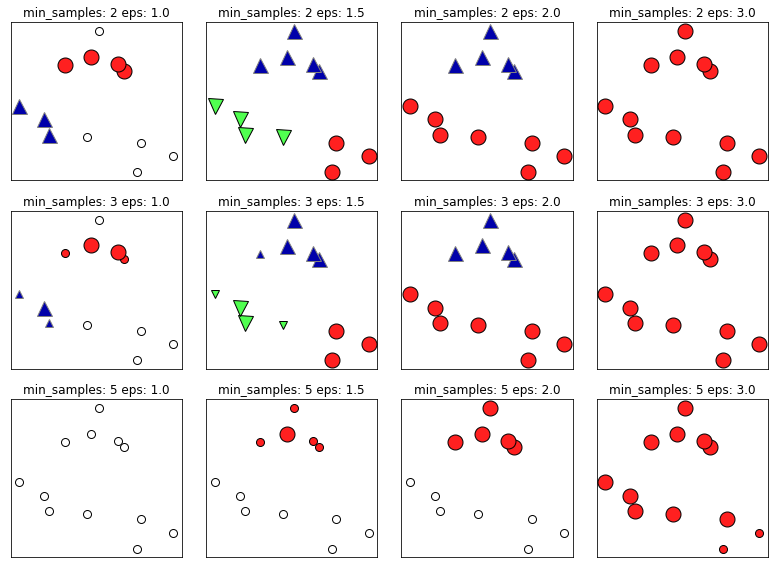

In [63]:
mglearn.plots.plot_dbscan()

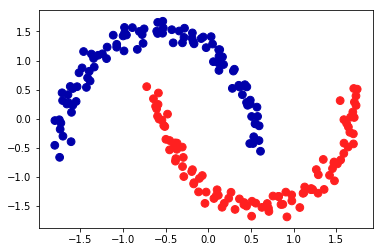

In [64]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60)

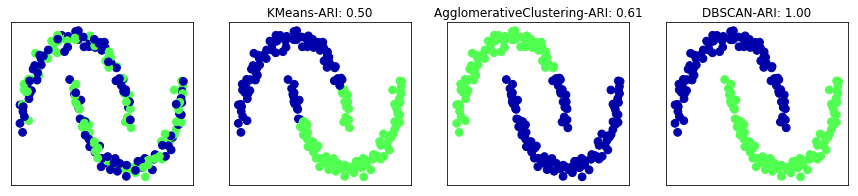

In [65]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4,figsize=(15,3),subplot_kw={'xticks':(), 'yticks':()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60)

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{}-ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))


In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [67]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [68]:
dbscan = DBSCAN(min_samples=3, eps = 15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


In [69]:
print("Number ... !：{}".format(np.bincount(labels+1)))

Number ... !：[  20 1083]


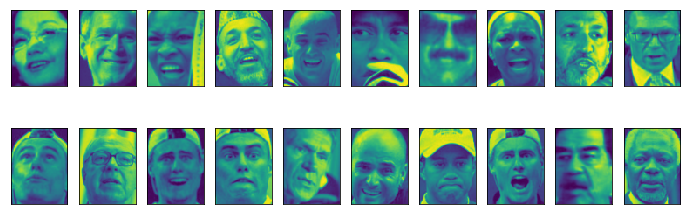

In [70]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(2,10,subplot_kw={'xticks': (), 'yticks':()}, figsize=(12,4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [71]:
for eps in [1,3,5,7,9,11,13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Clusters present: {}".format(np.unique(labels)))
    print("Clusters sizes:{}".format(np.bincount(labels + 1)))


eps=1
Clusters present: [-1]
Clusters sizes:[1103]

eps=3
Clusters present: [-1]
Clusters sizes:[1103]

eps=5
Clusters present: [-1]
Clusters sizes:[1103]

eps=7
Clusters present: [-1  0  1  2  3  4  5  6  7]
Clusters sizes:[1050   15    3    3   15    5    6    3    3]

eps=9
Clusters present: [-1  0]
Clusters sizes:[687 416]

eps=11
Clusters present: [-1  0]
Clusters sizes:[252 851]

eps=13
Clusters present: [-1  0]
Clusters sizes:[  80 1023]


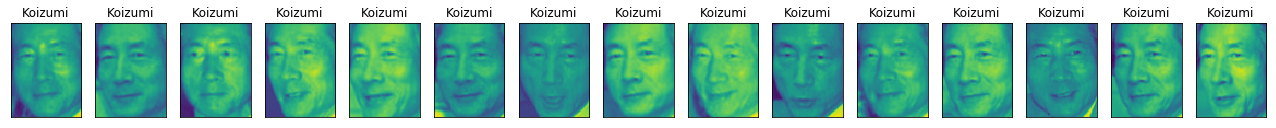

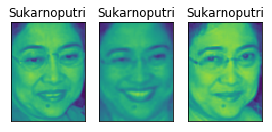

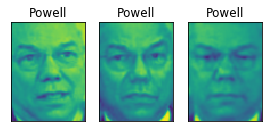

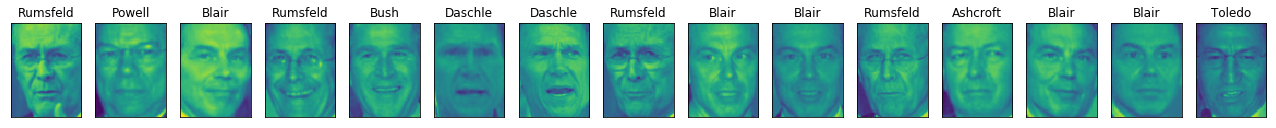

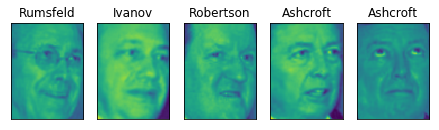

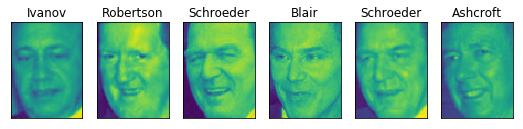

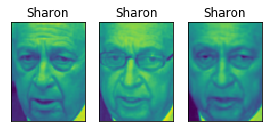

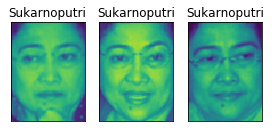

In [72]:
dbscan = DBSCAN(min_samples=3,eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1,n_images, figsize=(n_images * 1.5, 4),subplot_kw={'xticks': (),'yticks': ()})
    
    for image, label, ax in zip(X_people[mask],y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

In [73]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [  9 208 251 131 267  26  54  64  25  68]


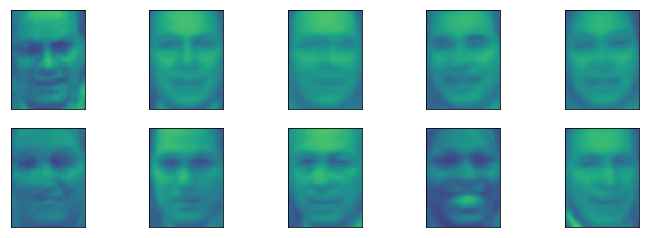

In [74]:
fig, axes = plt.subplots(2,5,subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12,4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),vmin=0,vmax=1)

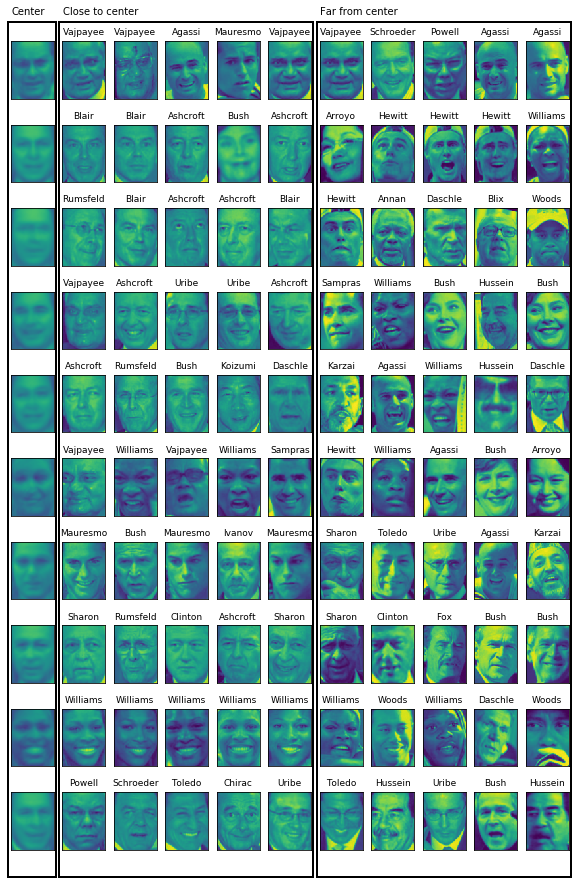

In [76]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

In [77]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

Cluster sizes agglomerative clustering: [458 191  91   8 109  69   8 126  24  19]


In [80]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.06


Text(0.5, 0, 'Sample index')

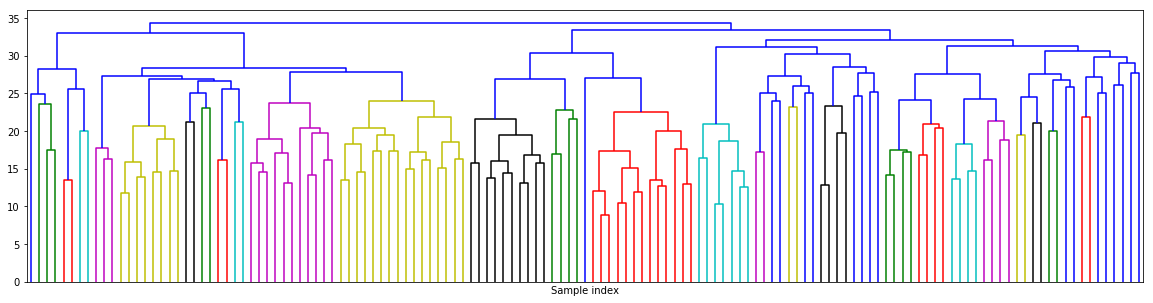

In [85]:
linkage_array = ward(X_pca)

plt.figure(figsize=(20,5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")